# **جلسه سوم: نمایش خرید و فروش سیگنال با الگوریتم خوشه بندی و نمایش توزیع احتمال و توزیع جمعیت خوشه ها**
*********************************************************************
 جفت ارز بیت کوین با دلار استرلیا


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


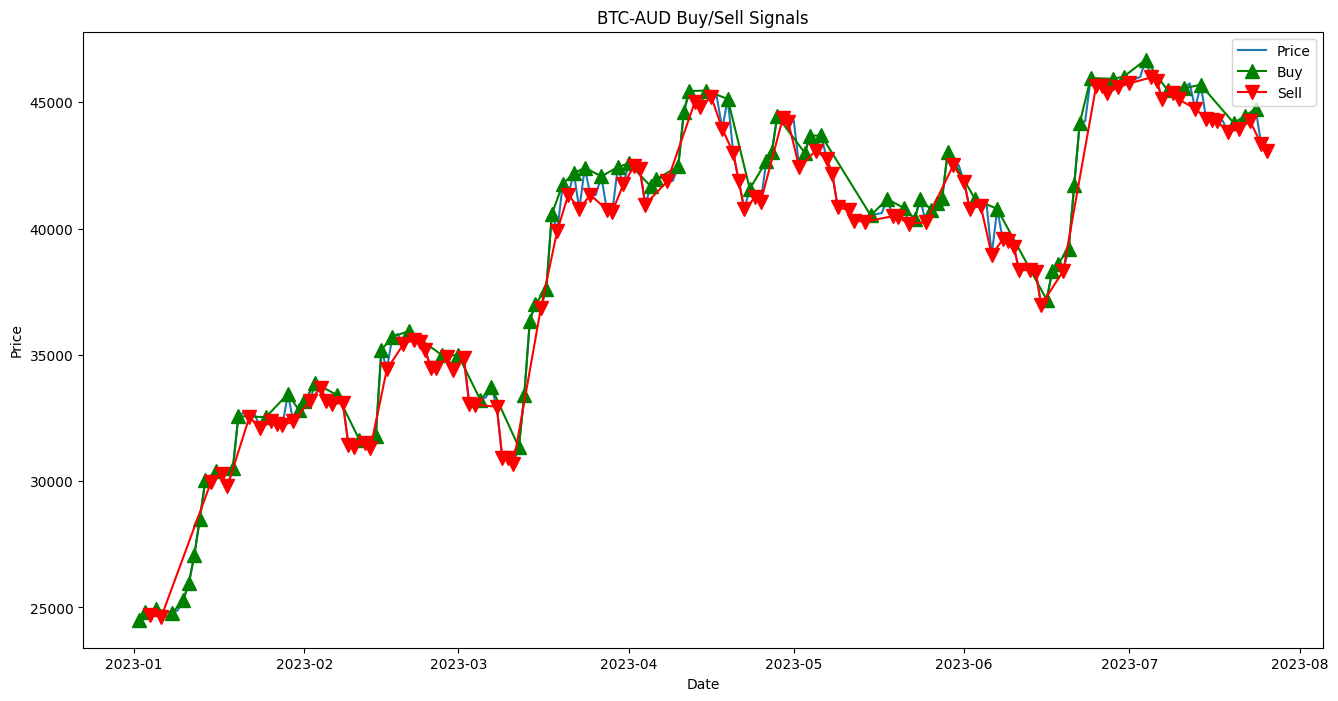

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the stock symbol, start date, and end date
stock_symbol = "BTC-AUD"
start_date = "2023-01-01"
end_date = "2023-07-27"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the percentage return of the closing price
df['pct_return'] = df['Adj Close'].pct_change()

# Remove the first row (which contains NaN values)
df.dropna(inplace=True)
# Perform k-means clustering with k=9
X = np.array(df['pct_return']).reshape(-1, 1)

kmeans = KMeans(n_clusters=9, random_state=42).fit(X)

# Define a function to calculate the cluster boundaries using the samples closest to the cluster center
def calculate_cluster_boundaries(cluster_indices, cluster_center):
    cluster_distances = np.abs(X[cluster_indices] - cluster_center)
    min_distance = np.min(cluster_distances)
    max_distance = np.max(cluster_distances)
    return min_distance, max_distance



# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Calculate the boundaries for each cluster

cluster_boundaries = {}

for i in range(9):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_center = kmeans.cluster_centers_[i]
    min_distance, max_distance = calculate_cluster_boundaries(cluster_indices, cluster_center)
    cluster_boundaries[i] = [min_distance, max_distance]

df['boundaries'] = df['cluster'].map(cluster_boundaries)

# Calculate the signals
df['signals'] = np.where(df['pct_return'] < df['boundaries'].apply(lambda x: x[0]), -1, np.where(df['pct_return'] > df['boundaries'].apply(lambda x: x[1]), 1, 0))

# Plot the signals
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='Price')
plt.plot(df[df['signals'] == 1]['Adj Close'], marker='^', markersize=10, color='g', label='Buy')
plt.plot(df[df['signals'] == -1]['Adj Close'], marker='v', markersize=10, color='r', label='Sell')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_symbol} Buy/Sell Signals')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
             Returns
Date                
2023-01-02  0.104898
2023-01-03  0.361858
2023-01-04 -0.306977
2023-01-05  0.276171
2023-01-06 -0.624388
...              ...
2023-07-22  0.336943
2023-07-23 -0.312159
2023-07-24  0.343594
2023-07-25 -1.435569
2023-07-26 -0.396265

[206 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


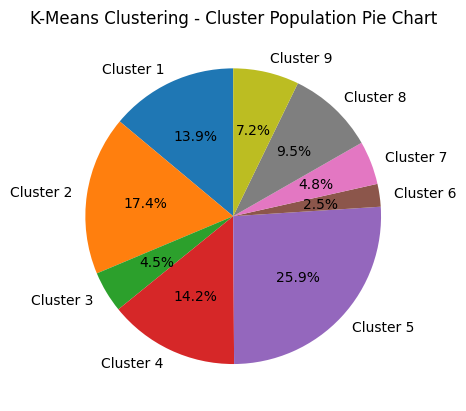

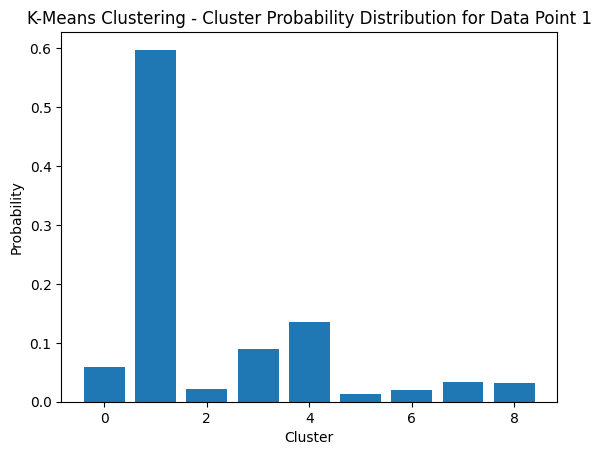

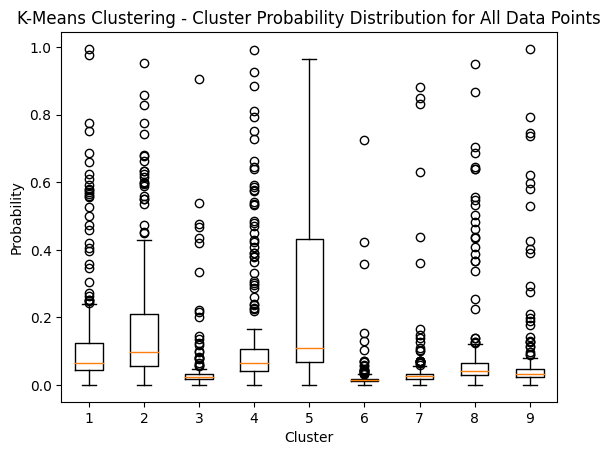

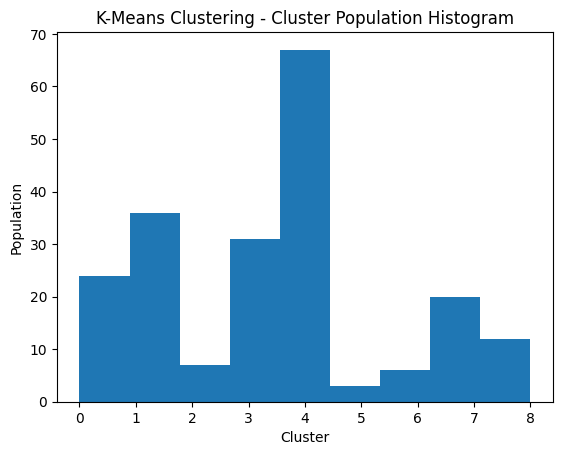

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


# Number of clusters

n_clusters = 9

# Define the stock specifications
stock_symbol = "BTC-AUD"
start_date = "2023-01-01"
end_date = "2023-07-27"


# Download the stock data from Yahoo Finance
df= yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the daily returns
df['Returns'] = df['Close'].pct_change()

# Drop the first row (which has a NaN value)
df = df.dropna()

# Preprocess the data
X = df[['Returns']]
X = (X - X.mean()) / X.std()  # Standardize the data
print(X)

# Define and initialize kmeans object
kmeans = KMeans(n_clusters=n_clusters)

# Run K-Means algorithm on data
kmeans.fit(X)

# Calculate estimated cluster probability for each candle
dists = kmeans.transform(X)
probs_i = np.zeros((len(X), n_clusters))

for j in range(len(X)):

    probs_i_j = [1 / d for d in dists[j]]

    prob_i_j = probs_i_j / sum(probs_i_j)

    probs_i[j] = prob_i_j


# Pie chart of cluster population
cluster_populations = np.zeros(n_clusters)

for i in range(n_clusters):

    cluster_populations[i] = np.sum(probs_i[:, i])

plt.pie(cluster_populations, labels=['Cluster {}'.format(i+1) for i in range(n_clusters)], startangle=90, autopct='%1.1f%%')

plt.title('K-Means Clustering - Cluster Population Pie Chart')
plt.show()

# Distribution plot of cluster probabilities for a single data point
idx = 0

plt.bar(range(n_clusters), probs_i[idx])

plt.title('K-Means Clustering - Cluster Probability Distribution for Data Point {}'.format(idx+1))
plt.xlabel('Cluster')
plt.ylabel('Probability')
plt.show()

# Distribution plot of cluster probabilities for all data points
plt.boxplot(probs_i)

plt.title('K-Means Clustering - Cluster Probability Distribution for All Data Points')
plt.xlabel('Cluster')
plt.ylabel('Probability')
plt.show()


# Histogram of cluster population
plt.hist(kmeans.labels_, bins=n_clusters)
plt.title('K-Means Clustering - Cluster Population Histogram')
plt.xlabel('Cluster')
plt.ylabel('Population')
plt.show()